<h1 style='color:white'>TP Integrador - CaC Big Data</h1>
<center><img src ='/work/img/portada.png'></center>

In [1]:
# Sometimes we need to install new libraries. Checking openpyxl is installed so we can read our files
!pip install openpyxl==3.0.10

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql3
import seaborn as sns


<h2>Project's Scope and Data Gathering</h2>
<h3>Project's Scope</h3>
<p>
In this project we are going to integrate three data sets with a list of vendors, a list of articles and a monthly record of transactions, which will help us answer the following questions: </p>
<ul>
<li>What is the best selling item? (units)</li>
<li>What item is the one that gave us the most income?</li>
<li>Which seller should be awarded the "Best seller of the Month" bonus?</li>
<li>Are there large variations in sales throughout the month?</li>
<li>What are the 5 countries that generated the most sales? And the 5 that sold the most?</li>
<li>What are the items that the best seller sold? What countries did he sell to?</li>
<li>What is the country that generates the least sales?</li>
</ul>
<h5>For this project we will use Pandas for exploratory analysis, Numpy for columns analysis and Matplotlib/Seaborn for visualization.</h5>
</ul>
<h3>Description and Data Gathering</h3>
<h4>Data sources</h4>
<ul>
<li>articles.db: Databse with articles data.</li>
<li>sellers.xlsx: Sellers data.</li>
<li>orders.csv: Record of monthly sales.</li>
</ul>

In [3]:
# Getting the 3 sources.

#Articles

conn = sql3.connect('data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn )
df_articles = pd.DataFrame(sql_query, columns=['article_id','article_name', 'unit_price'])

#Sellers

df_sellers = pd.read_excel('data/sellers.xlsx',index_col=0)


#Orders

df_orders = pd.read_csv('data/orders.csv')
#df_orders
df_orders

,order_id,week,article_id,quantity,seller_id,country_name
0,15024,1,20039,10,10,Peru
1,15025,1,20029,15,5,Peru
2,15026,1,20024,5,14,Bolivia
3,15027,1,20018,9,14,Brazil
4,15028,1,20035,6,15,Mexico
...,...,...,...,...,...,...
995,16019,4,20021,1,7,Brazil
996,16020,4,20040,15,15,Brazil
997,16021,4,20040,2,11,Colombia
998,16022,4,20018,14,11,Brazil


<h2>Step 2: Explore and build data</h2>
<h3>Exploration</h3>

In [4]:
# Articles DF Exploration

print('Data Sample')
print(df_articles.head)

print('\nDataframe format')
print(df_articles.shape)

print('\nLooking for null values')
print(df_articles.isnull().sum())

print("\nDataframe's data format")
print(df_articles.dtypes)


Data Sample
<bound method NDFrame.head of     article_id      article_name unit_price
0        20015        Smartphone     525.00
1        20016           Full Pc    2127.81
2        20017           Monitor     230.00
3        20018            Tablet     130.00
4        20019              Desk     130.10
5        20020             Chair     335.64
6        20021             Modem      67.50
7        20022    Range Extender      20.45
8        20023          Notebook    1000.00
9        20024           Netbook     145.00
10       20025               HDD      54.62
11       20026               SDD      22.00
12       20027        Ram Memory      35.95
13       20028       Motherboard     138.38
14       20029             Mouse      30.30
15       20030        Fan Cooler       4.25
16       20031            Webcam      20.07
17       20032          Keyboard      22.60
18       20033        Headphones      23.30
19       20034           Scanner     185.00
20       20035              Case  

In [5]:
# Sellers DF Exploration

print('Data Sample')
print(df_sellers.head)

print('\nDataframe format')
print(df_sellers.shape)

print('\nLooking for null values')
print(df_sellers.isnull().sum())

print("\nDataframe's data format")
print(df_sellers.dtypes)

Data Sample
<bound method NDFrame.head of                  seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres
6           Milly Christoffe
7                 Kati Innot
8              Tobin Roselli
9               Onida Cosely
10           Cirilo Grandham
11           Vasily Danilyuk
12          Brockie Patience
13           Arnold Kilkenny
14            Janel O'Curran
15           Daisie Slograve>

Dataframe format
(15, 1)

Looking for null values
seller_name    0
dtype: int64

Dataframe's data format
seller_name    object
dtype: object


In [6]:
# Orders DF Exploration

print('Data Sample')
print(df_orders.head)

print('\nDataframe format')
print(df_orders.shape)

print('\nLooking for null values')
print(df_orders.isnull().sum())

print("\nDataframe's data format")
print(df_orders.dtypes)

Data Sample
<bound method NDFrame.head of      order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]>

Dataframe format
(1000, 6)

Looking for null values
order_id        0
week            0
article_id      0
quantity        0
seller_id      

<h3>Building</h3>
<p>Articles DF has the 'unit_price' column as 'object'. I need to change it to float.</p>

In [7]:
#Changing column data to float

df_articles['unit_price'] = df_articles['unit_price'].astype(float)

print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


<h2>Step 3: Defining the data Model</h2>
<p>We will create a new dataframe from the data sources.</p>
<img src='img/modelo.png'>


<h2>Step 4: Running pipelines for data modelling</h2>
<p>We call pipeline a series of processes in which the output of one process is the input used by the next process.</p>

In [8]:
#I create df_orders copy

my_df=df_orders.copy()



df_articles.set_index('article_id', inplace=True) #Indicating that article_id will we my index

#Creating new columns. I use 'dummy values' so I can later bring the values i really want.
my_df = my_df.assign(article_name = my_df['article_id']) 
my_df = my_df.assign(total_amount = my_df['article_id'])
my_df = my_df.assign(seller_name = my_df['seller_id'])





In [9]:
#I add the values I need to the recently created columns.

for i in range (len(my_df.index)):
    article = df_articles.loc[my_df.loc[i]['article_id']]['article_name']
    my_df.loc[i, 'article_name'] = article
    my_df.loc[i, 'seller_name'] = df_sellers.loc[my_df.loc[i]['seller_id']]['seller_name']
    my_df.loc[i, 'total_amount'] = df_articles.loc[my_df.loc[i]['article_id']]['unit_price'] * my_df.loc[i, 'quantity']

#Deleting unwanted columns
my_df.drop(['article_id', 'seller_id', 'order_id'], axis='columns', inplace=True)
print(my_df.head())

   week  quantity country_name   article_name  total_amount      seller_name
0     1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1     1        15         Peru          Mouse         454.5      Ewell Peres
2     1         5      Bolivia        Netbook         725.0   Janel O'Curran
3     1         9       Brazil         Tablet        1170.0   Janel O'Curran
4     1         6       Mexico           Case         227.4  Daisie Slograve


<h2>Step 5: Answering Questions</h2>


<h3>1. What is the best selling item? (units)</h3>

In [10]:
my_df2= my_df.groupby('article_name').sum()
por_cantidad = my_df2.sort_values('quantity', ascending = False)

print(por_cantidad['quantity'].head(5))

#print(my_df2['article_name'].max())


article_name
HDD        413
Tablet     374
SDD        372
Mouse      322
Netbook    320
Name: quantity, dtype: int64


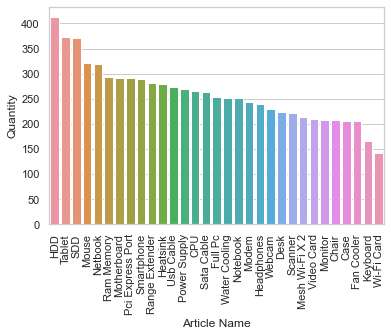

In [11]:
# Graphic resolution

sns.set_theme(style=('whitegrid'), palette='dark')
sns.barplot(x=my_df2.index, y=my_df2['quantity'], data=my_df2, order=my_df2.sort_values('quantity', ascending=False).index)
plt.xlabel('Article Name')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()





<h3>2. What item is the one that gave us the most income?</h3>

In [12]:
my_df3= my_df.groupby('article_name').sum()
por_cantidad = my_df3.sort_values('total_amount', ascending = False).head()

print(por_cantidad['total_amount'])



article_name
Full Pc       538335.93
Notebook      251000.00
Smartphone    152250.00
Chair          69477.48
Tablet         48620.00
Name: total_amount, dtype: float64


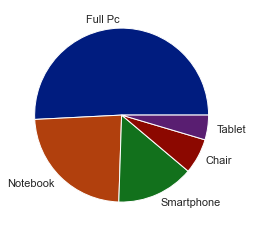

In [13]:
#sns.barplot(x=my_df2.index, y=my_df2['total_amount'], data=my_df2, order=my_df2.sort_values('total_amount', ascending=False).index)
#plt.xticks(rotation=90)

plt.pie(x=por_cantidad['total_amount'], labels=por_cantidad.index)

plt.show()

<h3>3. Which seller should be awarded the "Best seller of the Month" bonus?</h3>

In [14]:
my_df4= my_df.groupby('seller_name').sum().sort_values('total_amount', ascending= False)

print(my_df4[['quantity']+['total_amount']].head())


                   quantity  total_amount
seller_name                              
Janel O'Curran          703     192832.47
Brockie Patience        441     142709.88
Oliviero Charkham       555     141329.76
Vasily Danilyuk         521     129157.55
Daisie Slograve         554     120520.11


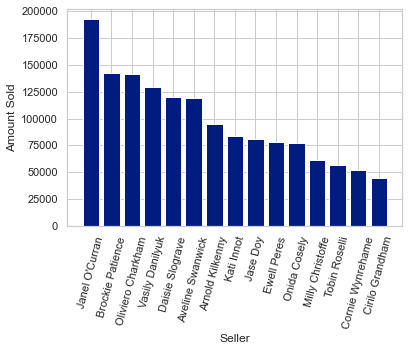

In [15]:
plt.bar(my_df4.index, my_df4['total_amount'])
plt.xlabel('Seller')
plt.ylabel('Amount Sold')
plt.xticks(rotation=75)
plt.show()

<h3>4. Are there large variations in sales throughout the month?</h3>
<h4>If so, when should I launch a promotional campaign?</h4>


In [16]:
my_df5= my_df.groupby('week').sum()
print(my_df5)


      quantity  total_amount
week                        
1         2449     507458.81
2         2444     415364.44
3         2114     329140.03
4         1058     223844.56


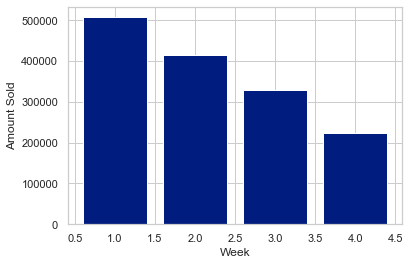

In [17]:
plt.bar(my_df5.index, my_df5['total_amount'])
plt.ylabel('Amount Sold')
plt.xlabel('Week')
plt.show()

<h3>5. What are the 5 countries that generated the most sales? And the 5 that sold the most?</h3>


In [18]:
pais = my_df.groupby('country_name').sum().sort_values('total_amount', ascending= False).head(5)
pais1= my_df.groupby('country_name').sum().sort_values('quantity', ascending= False).head(5)

print('Top 5 countries by amount:')
print('\n')
print(pais[['total_amount']])
print('\n')
print('Top 5 countries by quantity')
print('\n')
print(pais1[['quantity']])




Top 5 countries by amount:


              total_amount
country_name              
Brazil           441271.85
Argentina        205832.78
Colombia         177514.29
Peru             161421.12
Mexico           138619.99


Top 5 countries by quantity


              quantity
country_name          
Brazil            2515
Peru              1027
Argentina          947
Colombia           881
Mexico             846


Top 5 by amount:


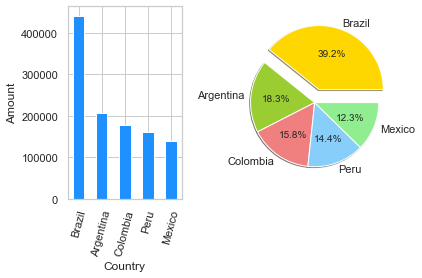


Top 5 countries by quantity:


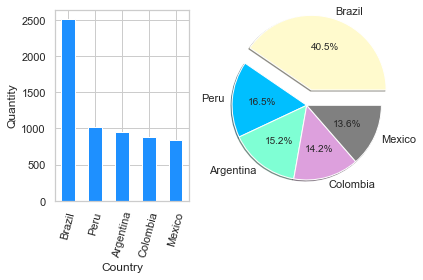

In [19]:
print('Top 5 by amount:')
plt.subplot(1,2,1)
plt.bar(pais.index, pais['total_amount'], width=0.5, color='dodgerblue')
plt.xticks(rotation=75)
plt.ylabel('Amount')
plt.xlabel('Country')

plt.subplot(1,2,2)
e=(0.3,0,0,0,0)
c=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen']
plt.pie(x=pais['total_amount'], labels=pais.index, explode=e, radius=1.4, autopct='%1.1f%%',colors=c, shadow=True)

plt.tight_layout()
plt.show()

print()
print('Top 5 countries by quantity:')

plt.subplot(1,2,1)
plt.bar(pais1.index, pais1['quantity'], width=0.5, color='dodgerblue')
plt.xticks(rotation=75)
plt.ylabel('Quantity')
plt.xlabel('Country')

plt.subplot(1,2,2)
e=(0.3,0,0,0,0)
c=['lemonchiffon','deepskyblue','aquamarine','plum','grey']
plt.pie(x=pais1['quantity'], labels=pais1.index, explode=e, radius=1.4, autopct='%1.1f%%',colors=c, shadow=True)


plt.tight_layout()
plt.show()



<h3>6. What are the items that the best seller sold? What countries did he sell to?</h3>



In [20]:
vendedor= my_df[['seller_name','article_name','quantity','country_name']].copy()
vendedor2= vendedor.groupby(['seller_name','article_name'],as_index=False)['quantity'].sum()
janel=vendedor.loc[vendedor['seller_name']== "Janel O'Curran"]
janel1= janel.groupby('article_name').sum().sort_values('quantity', ascending= False)
janel2= janel.groupby('country_name').sum().sort_values('quantity', ascending= False)

print(janel1)
print(janel2)


                  quantity
article_name              
HDD                     75
Range Extender          62
Full Pc                 56
Netbook                 41
Tablet                  38
Smartphone              32
CPU                     27
Fan Cooler              27
Webcam                  25
Scanner                 25
SDD                     24
Usb Cable               24
Case                    24
Mouse                   20
Desk                    20
Monitor                 18
Notebook                17
Water Cooling           16
Power Supply            16
Ram Memory              15
Heatsink                13
Headphones              13
Mesh Wi-Fi X 2          13
Sata Cable              12
Modem                   12
Wi-Fi Card              12
Pci Express Port        11
Keyboard                10
Motherboard              5
              quantity
country_name          
Brazil             182
Mexico             118
Colombia            93
Argentina           91
Peru                66
Ve

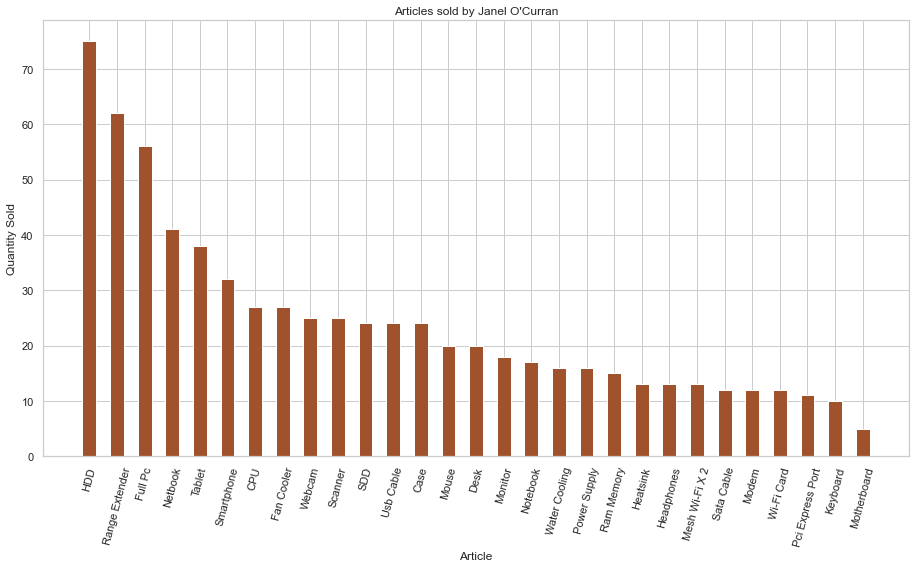

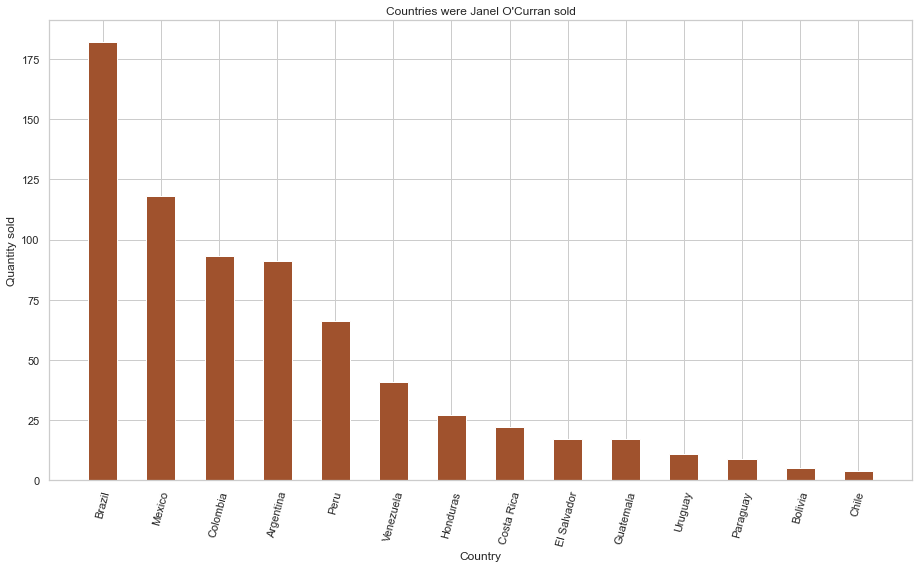

In [21]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.bar(janel1.index, janel1['quantity'], width=0.5, color='sienna')
plt.xticks(rotation=75)
plt.ylabel('Quantity Sold')
plt.title("Articles sold by Janel O'Curran")
plt.xlabel('Article')

plt.tight_layout()
plt.show()

plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.bar(janel2.index, janel2['quantity'], width=0.5, color='sienna')
plt.xticks(rotation=75)
plt.ylabel('Quantity sold')
plt.title("Countries were Janel O'Curran sold")
plt.xlabel('Country')

plt.tight_layout()
plt.show()


<h3>7. What is the country that generates the least sales? </h3>


In [22]:
# RESOLUCIÓN
peorpais= my_df[['article_name','quantity','total_amount','country_name']].copy()
peor2= peorpais.groupby('country_name').sum().sort_values('quantity', ascending= True)
pr= peorpais.loc[peorpais['country_name']== 'Puerto Rico']
print(peor2)
print(pr)

              quantity  total_amount
country_name                        
Puerto Rico         12       1265.43
Uruguay             92      17843.09
El Salvador        111      57391.26
Paraguay           123       8195.12
Ecuador            129      17475.30
Costa Rica         145      34606.50
Bolivia            181      22682.80
Guatemala          202      52579.25
Chile              231      24660.98
Honduras           303      36763.56
Venezuela          320      77684.52
Mexico             846     138619.99
Colombia           881     177514.29
Argentina          947     205832.78
Peru              1027     161421.12
Brazil            2515     441271.85
    article_name  quantity  total_amount country_name
116          CPU         9       1256.58  Puerto Rico
465    Usb Cable         3          8.85  Puerto Rico


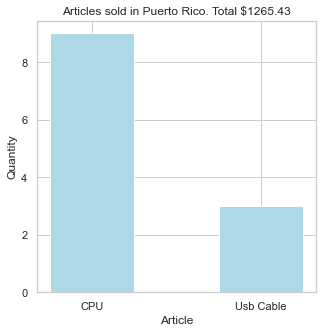

IT IS NOT PROFITABLE TO SELL IN PUERTO RICO DUE TO LOW DEMAND


In [23]:
plt.figure(figsize=(5,5))
plt.title('Articles sold in Puerto Rico. Total $1265.43')
plt.bar(pr['article_name'],pr['quantity'],width=0.5, color='lightblue')
plt.ylabel('Quantity')
plt.xlabel('Article')

plt.show()

print('IT IS NOT PROFITABLE TO SELL IN PUERTO RICO DUE TO LOW DEMAND')


<h2>Conclusions and proposals</h2>
<ul>

After analyzing the company's sales, we can conclude that sales broken down by item are good in all sectors. While we have a clear 'winner' product (HDD), the rest are selling almost on par in terms of quantity.

If we focus on a country level, we can notice a clear difference between Brazil and the rest (both in amounts and quantity). Furthermore, we can notice something similar when comparing the 5 countries that sell the most with the rest. This gap could be related to the economic power of each of them. Taking this into account, it was possible to see the low level of sales from Puerto Rico, with a total of 12 sales. The difference is even greater if we take into account that the next in line is Uruguay with 92 sales.

Regarding weekly sales, we can notice a clear decline between the first week and the last. This is clearly given by the amount of money that potential customers have as the month goes by. Greater amount in the first week (salary collection) and less at the end of the month due to expenses throughout the month.

Finally, we note that Janel O'Curran has been the best seller by a wide margin, approximately $50,000 and 300 units more than Brockie Patience, who ranks second.


My advice and proposals would be the following:

    - Keep the products as they are. They are sold at par and in good quantities.
    - Cease operations in Puerto Rico. It is not profitable to maintain an operation in the country considering that it sells extremely low quantities and a lot more than the rest.
    - Offer promotions, discounts or purchases in installments in the last week of the month. This will help raise sales. Bundles could be made with the products that sell less with those that sell the most, to level out the curve.
    - Try to replicate Janel O'Curran's sales strategy to the rest of the sellers. He is clearly the best seller by a wide margin and applying his sales experience to others is going to be extremely profitable.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70ad08ae-3a9c-4917-836b-d8bc041fe1d9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>